# Sensitivity Analysis


> You can try this tutorial on [Google Colab](https://colab.research.google.com/github/TUMT2022/LDIMBench/blob/main/docs/user-guides/run-sensitivity-analysis.ipynb)!

This guide will show you how to analyze the sensitivity of a method regarding to changing input data (resolution, noise, etc.).

First install the package:

In [4]:
# Run this in Google Colab:
!pip install ldimbenchmark
# %load_ext autoreload
# %autoreload 2

First download a dataset that we can use for the analysis:

In [1]:
from ldimbenchmark.datasets import Dataset, DatasetLibrary, DATASETS

battledim_dataset = DatasetLibrary("datasets").download(DATASETS.BATTLEDIM)

Dataset already downloaded


To test your method we need a dataset. We provide a few datasets in the [datasets namespace](#). You can also use your own dataset (see [run on your dataset guide](/docs/user-guides/run-on-your-dataset.ipynb)).

In [2]:
from ldimbenchmark.datasets.derivation import DatasetDerivator

derivator = DatasetDerivator(battledim_dataset, "datasets/derivations")
# All values given as half of the procentual range of the noise

# Adds gaussian noise to pressure measurements
derivator.derive_data("pressures", "precision", [0.05, 0.1, 0.15, 0.2, 0.25])

# Add noise to the heights of the model junctions to simulate a worser model
derivator.derive_model("junctions", "elevation", "accuracy", [0.05, 0.1, 0.15, 0.2, 0.25])

# Simulate a low resolution level measurement sensor (with given resolution in brackets) 
derivator.derive_data("levels", "sensitivity", [0.05, 0.1, 0.15, 0.2, 0.25])

datasets = derivator.get_dervived_datasets(True)
datasets

You can check out the derivations applied to the dataset by using the DatasetAnalyzer class:

/home/azureuser/LDIMBench/src/ldimbenchmark/datasets/analysis.py:104: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Analyze the dataset
/home/azureuser/LDIMBench/src/ldimbenchmark/datasets/analysis.py:104: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Analyze the dataset
/home/azureuser/LDIMBench/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/azureuser/LDIMBench/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


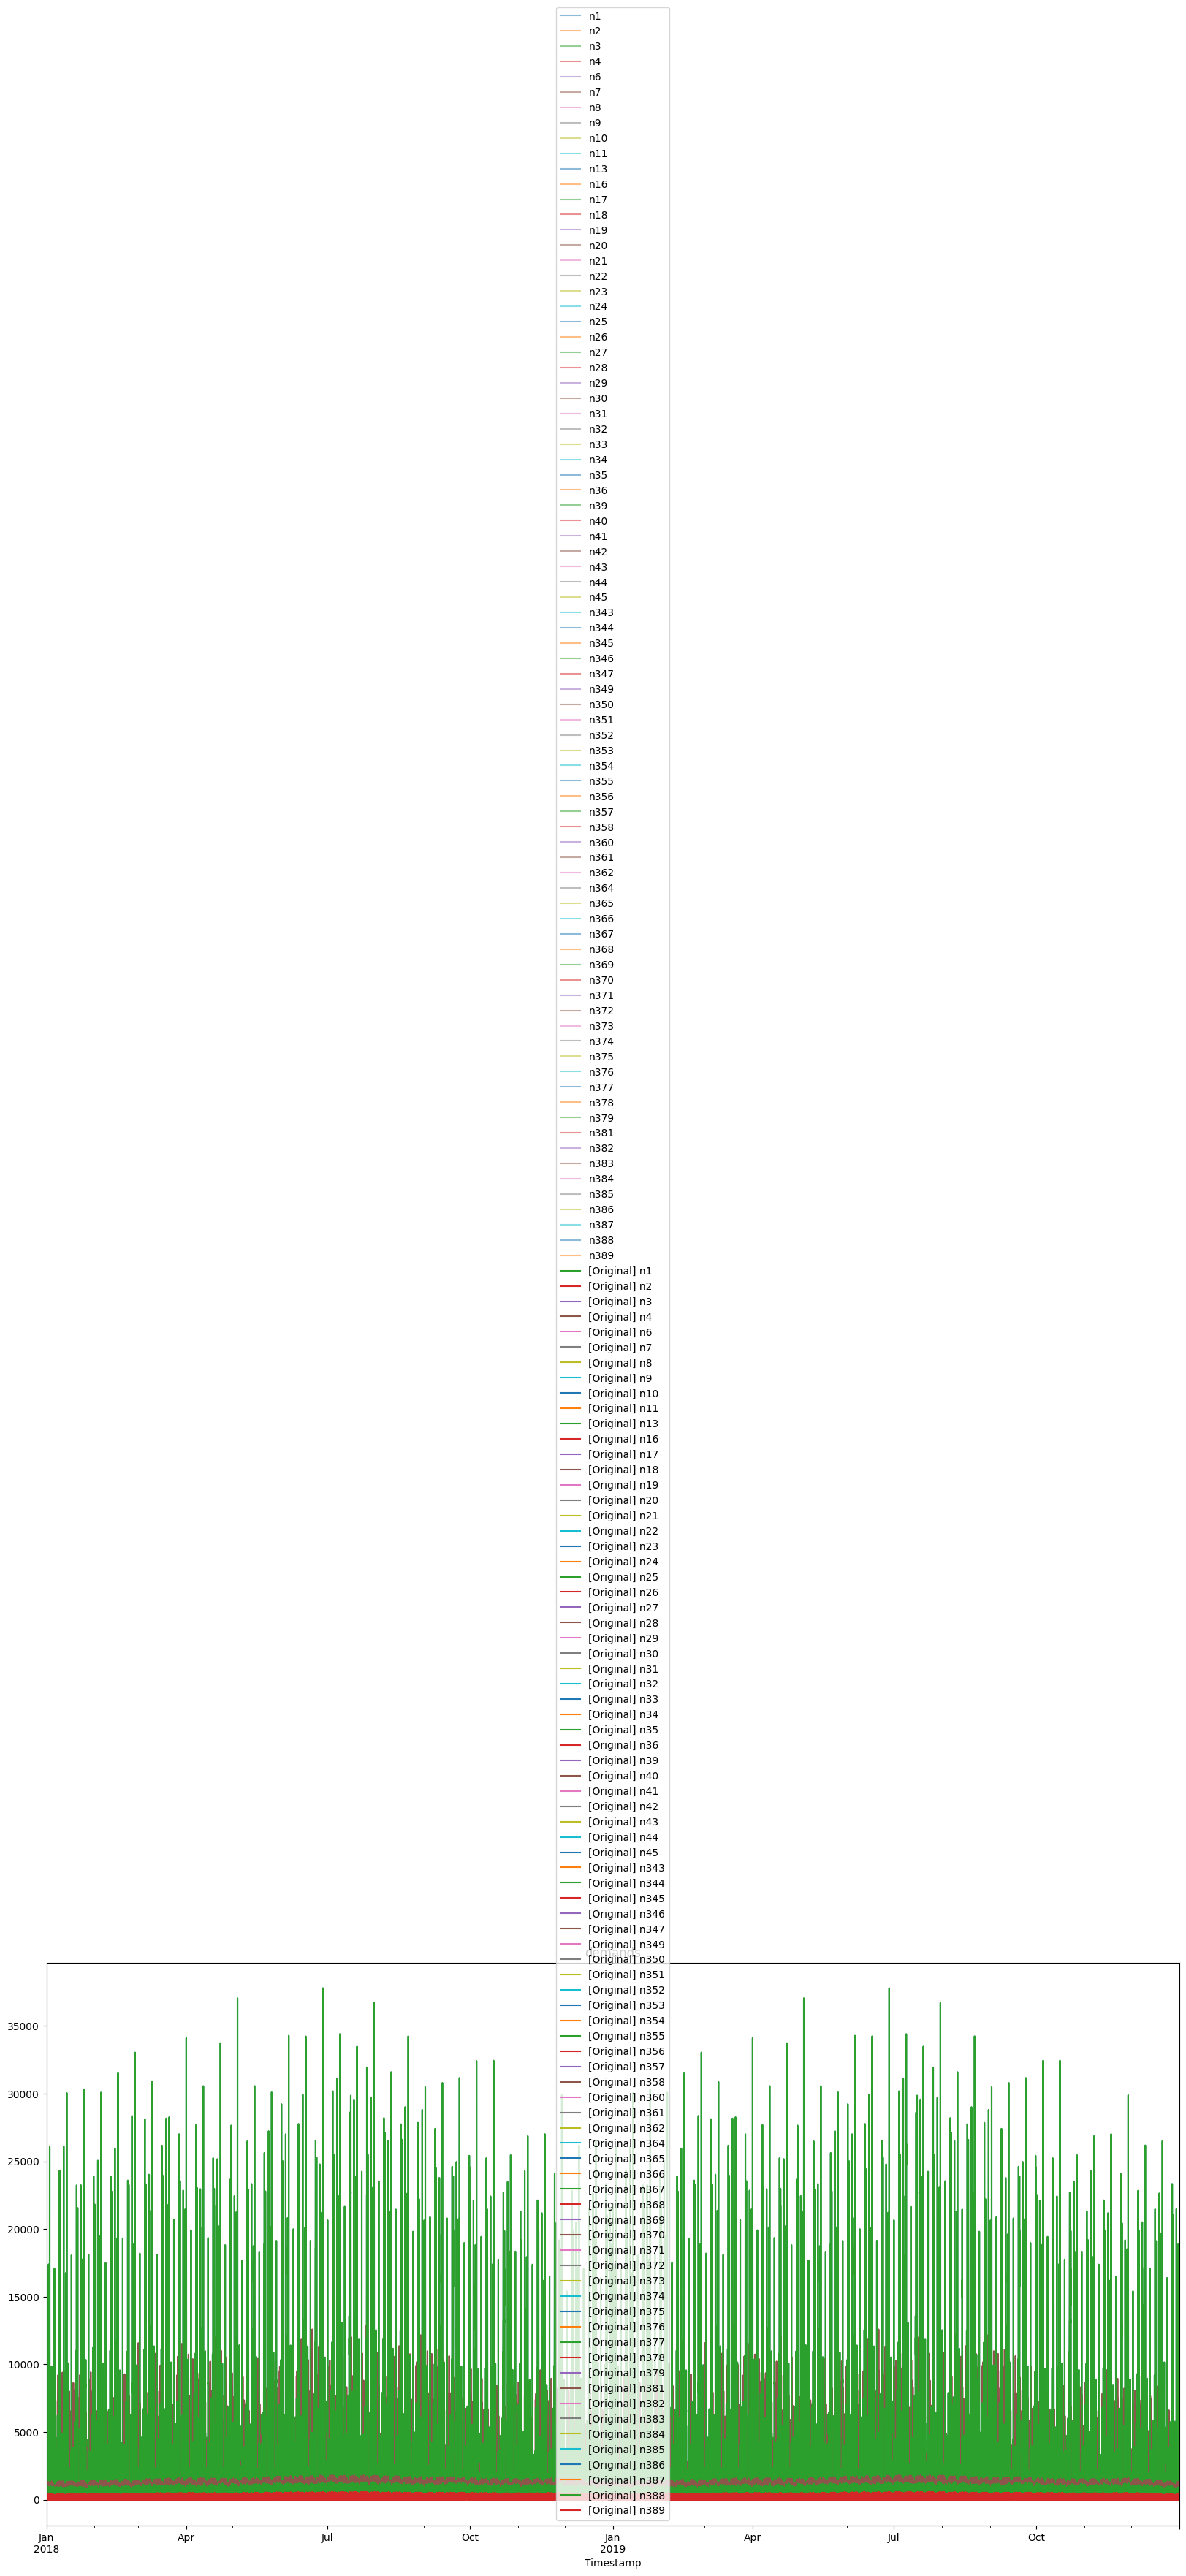

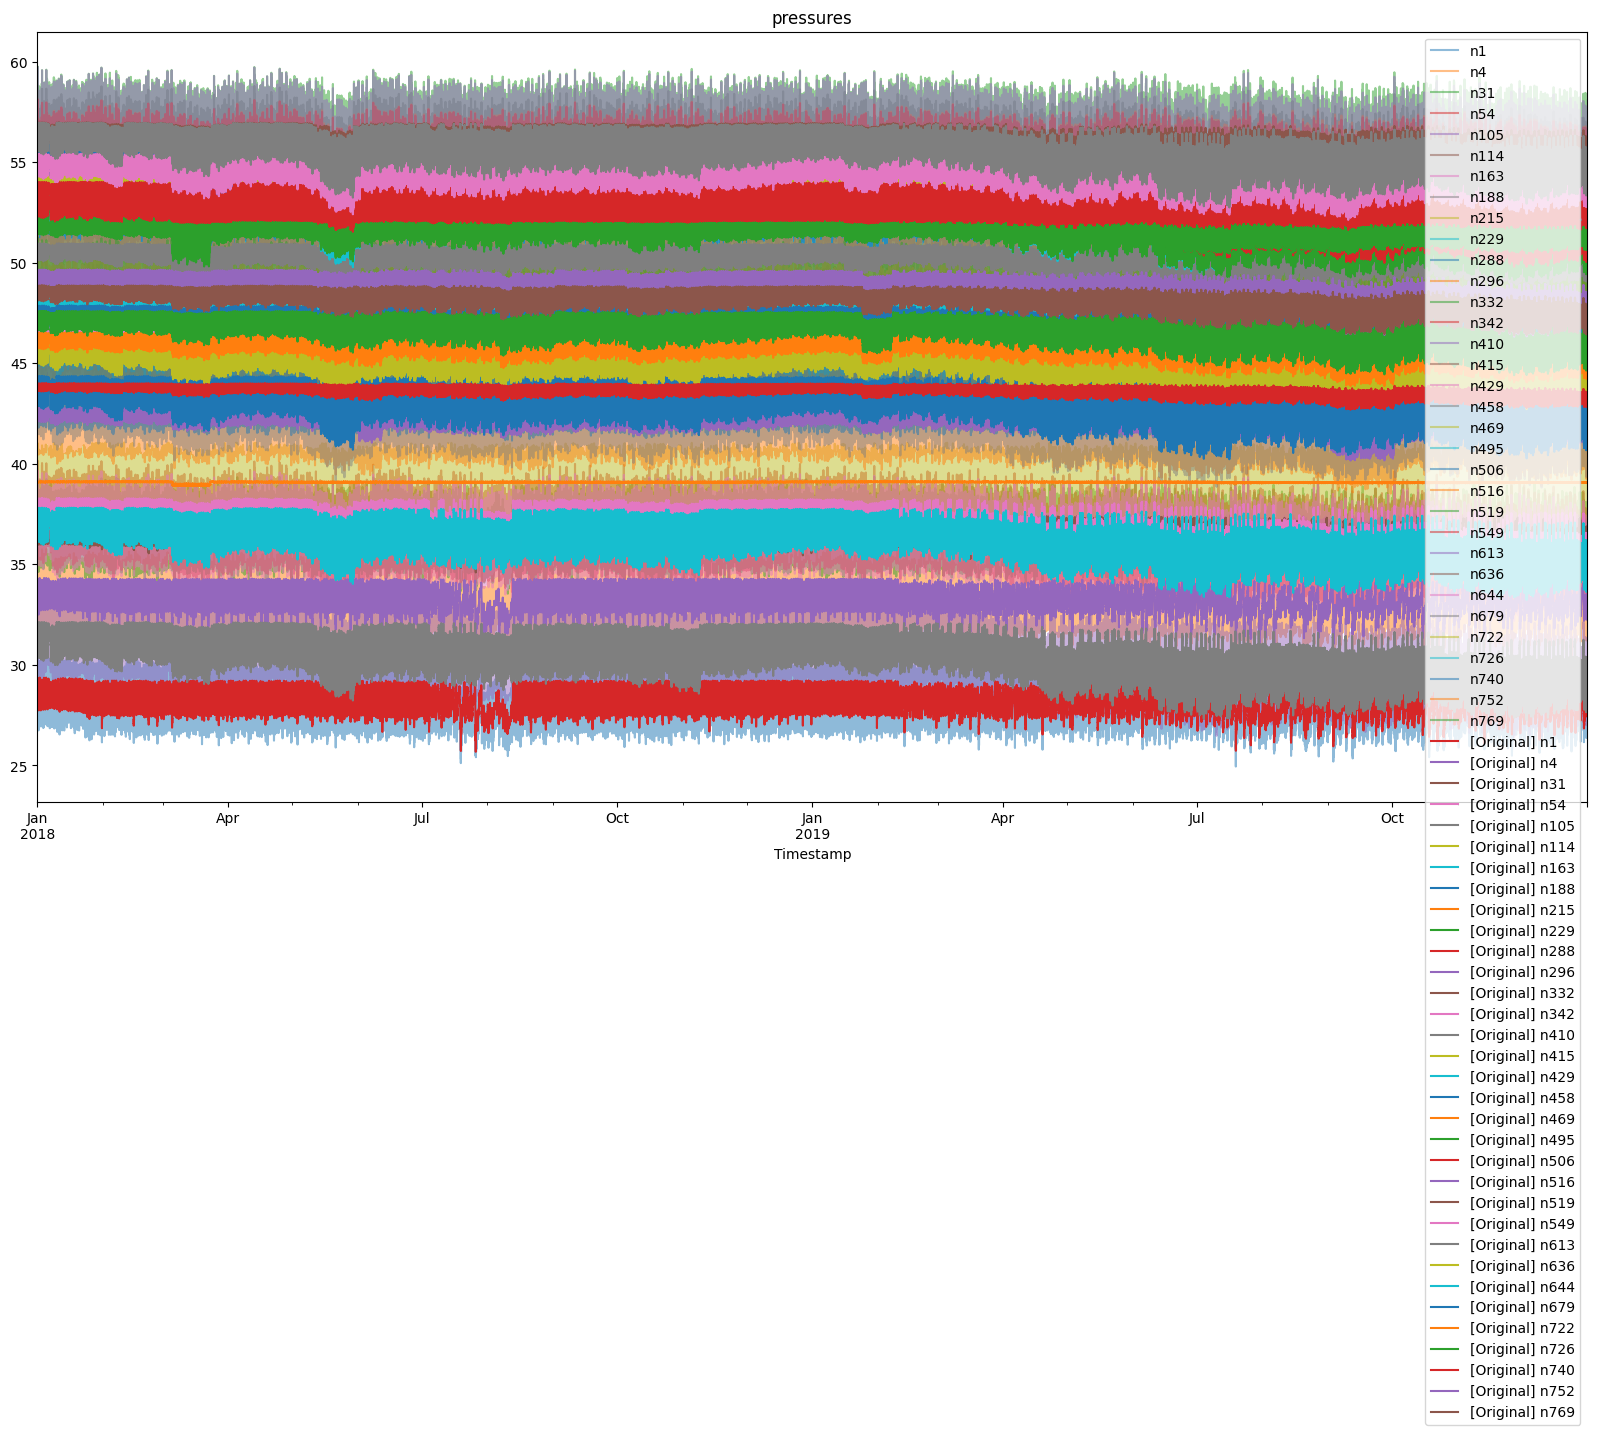

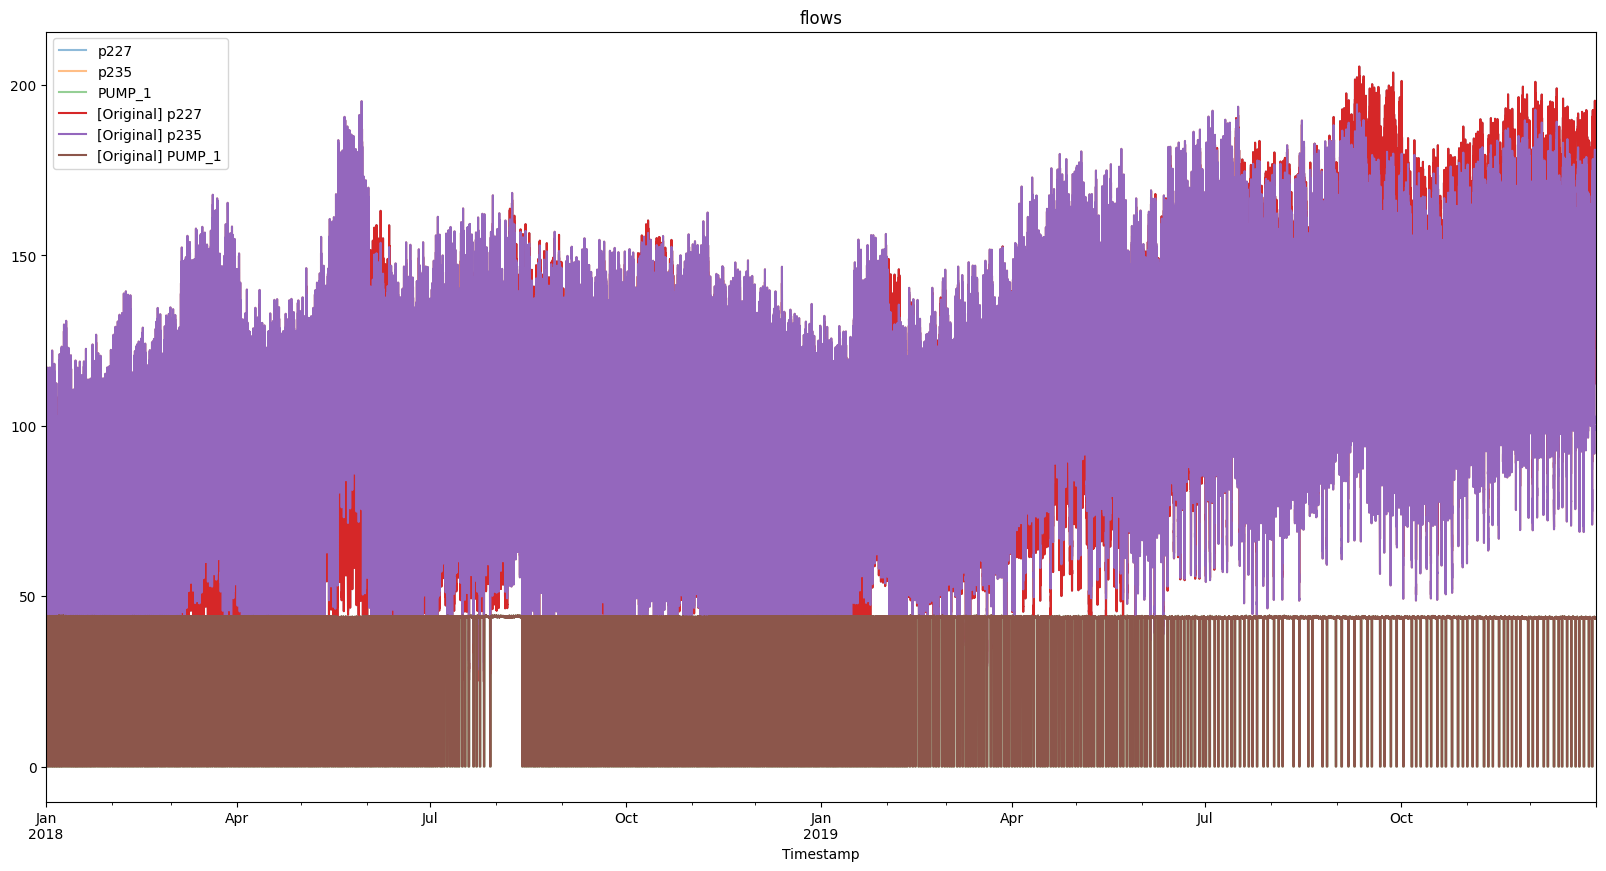

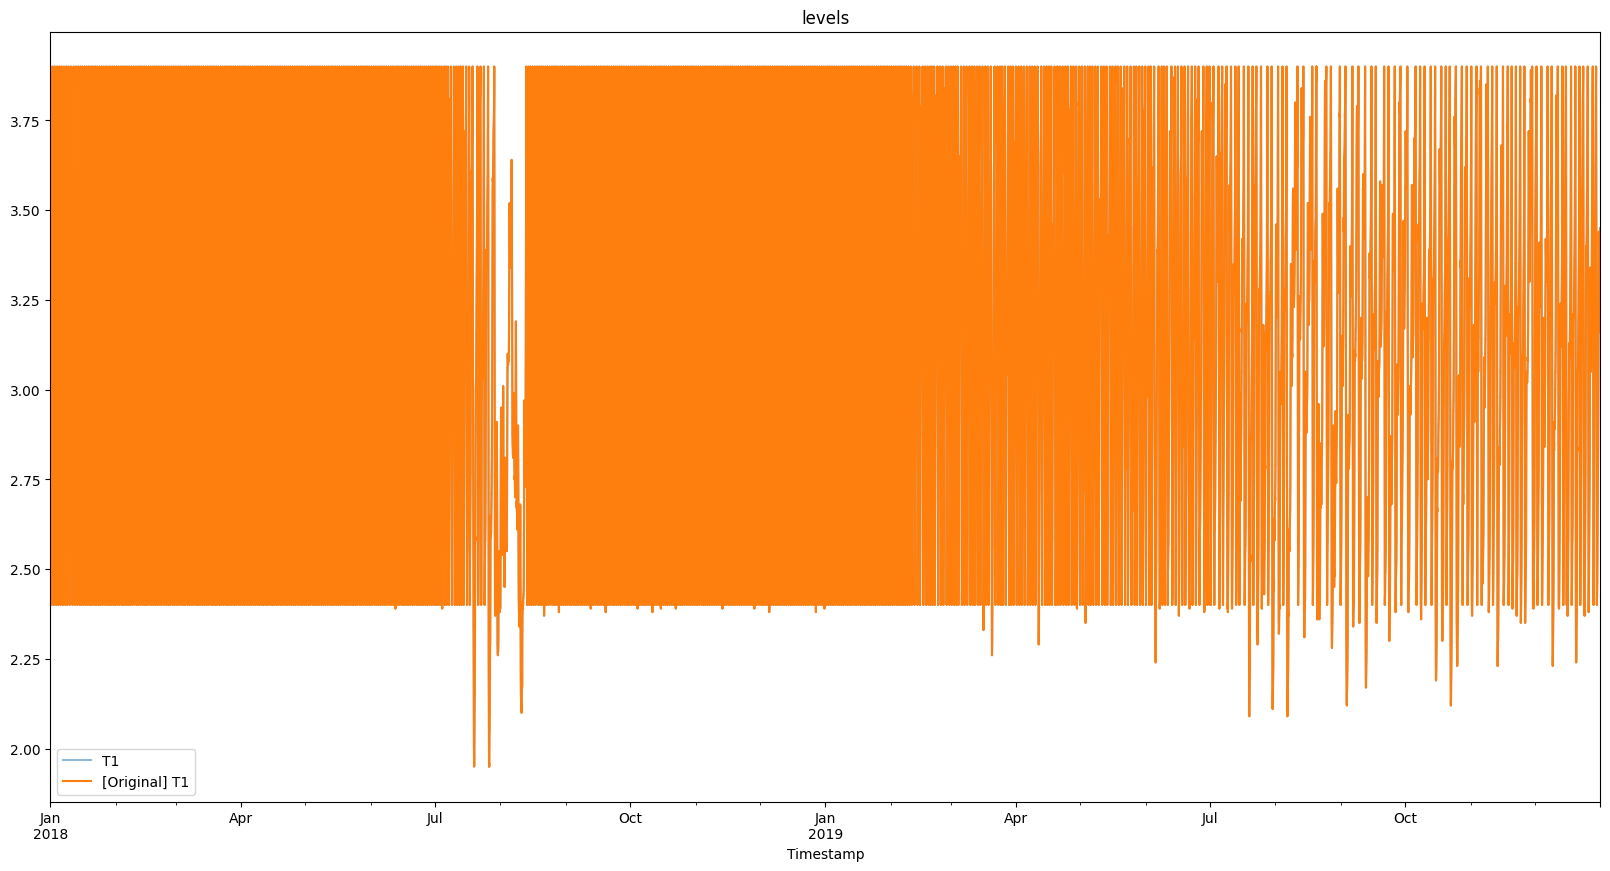

In [10]:
from ldimbenchmark.datasets.analysis import DatasetAnalyzer

analysis = DatasetAnalyzer("datasets-analysis")

analysis.compare(datasets[0:2])

We can now define the Benchmark and its parameters:

In [3]:
from ldimbenchmark import LDIMBenchmark
from ldimbenchmark.methods import LILA, MNF
import logging
logging.basicConfig(level=logging.INFO)

hyperparameters = {}

benchmark = LDIMBenchmark(
    hyperparameters,
    datasets,
    results_dir="./benchmark-results",
    debug=True,
)
benchmark.add_local_methods([LILA(), MNF()])

Finally we can run and evaluate the benchmark:

In [6]:
# execute benchmark
benchmark.run_benchmark(parallel=True)

  0%|          | 0/32 [00:00<?, ?it/s]INFO:root:Running LILA_battledim_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:Running MNF_battledim_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:> Training time for 'MNF': 7.796287536621094e-05
  3%|▎         | 1/32 [00:02<01:05,  2.12s/it]INFO:root:> Detection time for 'MNF': 0.014739751815795898
INFO:root:Running LILA_battledim-41e80300fa9a3d1aa263f266866eea42_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:Running MNF_battledim-41e80300fa9a3d1aa263f266866eea42_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:> Training time for 'MNF': 7.867813110351562e-05
  6%|▋         | 2/32 [00:03<00:56,  1.90s/it]INFO:root:> Detection time for 'MNF': 0.02191019058227539
INFO:root:Running LILA_battledim-7a68f07866337e05fad607ffb49d37f7_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:Running MNF_battledim-7a68f07866337e05fad607ffb49d37f7_99914b932bd37a50b983c5e7c90ae93b with params {}
INFO:root:> Detectio

In [4]:
benchmark.evaluate(current=False)

                                                          TP    FP  TN      FN  TTD         wrongpipe    dataset  score        precision    recall (TPR)    TNR    FPR       FNR          F1
------------------------------------------------------  ----  ----  ----  ----  --------  -----------  ---------  ---------  -----------  --------------  -----  -----  --------  ----------
('MNF', 'battledim-41e80300fa9a3d1aa263f266866eea42')     17    50           2  518400.0           17          0  battledim     0.253731        0.894737    nan    nan  0.105263    0.395349
('MNF', 'battledim-3d03711038495afc64fc414e5f59918a')     17    50           2  518400.0           17          0  battledim     0.253731        0.894737    nan    nan  0.105263    0.395349
('MNF', 'battledim-de831ae21f3701a51624961798c8b6d8')     17    50           2  518400.0           17          0  battledim     0.253731        0.894737    nan    nan  0.105263    0.395349
('LILA', 'battledim-820f24f251ce6363556bf62475a4977a') 

TP  FP    TN  FN  \
method    dataset_id                                                     
MNF       battledim-41e80300fa9a3d1aa263f266866eea42  17  50  None   2   
          battledim-3d03711038495afc64fc414e5f59918a  17  50  None   2   
          battledim-de831ae21f3701a51624961798c8b6d8  17  50  None   2   
LILA      battledim-820f24f251ce6363556bf62475a4977a   7  12  None  12   
MNF       battledim-dcc350327d7d193d90dcc06ecf8ebbf3  17  50  None   2   
          battledim-0d4e083b2d47049700caacf188aa75fb  17  50  None   2   
LILA      battledim-47aee06902d0e4ae5588355966a79bfe   7  12  None  12   
MNF       battledim-0381526a1389b180b13313746feb4d23  17  50  None   2   
LILA      battledim-dcc350327d7d193d90dcc06ecf8ebbf3   7  12  None  12   
          battledim-946f50c1b6b9a68ddffc97d129ef928d   7  12  None  12   
MNF       battledim-47aee06902d0e4ae5588355966a79bfe  17  50  None   2   
LILA      battledim-3d03711038495afc64fc414e5f59918a   7  12  None  12   
MNF       battledim-7a68f07866337e05fad607ffb49d37f7  17  50  None   2   
LILA      battledim-de831ae21f3701a51624961798c8b6d8   7  12  None  12   
MNF       battledim-1953027f85acbe5ddf3892770d6ef136  17  50  None   2   
LILA      battledim-0d4e083b2d47049700caacf188aa75fb   7  12  None  12   
          battledim-d95cd29c60c8baf1c525aef1d1e7d739   7  12  None  12   
NEWMETHOD battledim                                    0   0  None  19   
MNF       battledim-12b5ecf36e13c59bf8a03c2063c5884a  17  50  None   2   
LILA      battledim-6a38d0355168792939030195ad49c83b   7  12  None  12   
MNF       battledim-6a38d0355168792939030195ad49c83b  17  50  None   2   
          battledim-d95cd29c60c8baf1c525aef1d1e7d739  17  50  None   2   
LILA      battledim                                    6  14  None  13   
          battledim-41e80300fa9a3d1aa263f266866eea42   7  12  None  12   
MNF       battledim-820f24f251ce6363556bf62475a4977a  17  50  None   2   
          battledim-946f50c1b6b9a68ddffc97d129ef928d  17  50  None   2   
LILA      battledim-0381526a1389b180b13313746feb4d23   7  12  None  12   
          battledim-12b5ecf36e13c59bf8a03c2063c5884a   7  12  None  12   
MNF       battledim-a1270c196ef9e11a914943dd87bf928b  17  50  None   2   
          battledim                                   17  50  None   2   
LILA      battledim-7a68f07866337e05fad607ffb49d37f7   7  12  None  12   
          battledim-1953027f85acbe5ddf3892770d6ef136   7  12  None  12   
          battledim-a1270c196ef9e11a914943dd87bf928b   7  12  None  12   

                                                           TTD  wrongpipe  \
method    dataset_id                                                        
MNF       battledim-41e80300fa9a3d1aa263f266866eea42  518400.0         17   
          battledim-3d03711038495afc64fc414e5f59918a  518400.0         17   
          battledim-de831ae21f3701a51624961798c8b6d8  518400.0         17   
LILA      battledim-820f24f251ce6363556bf62475a4977a  249900.0          7   
MNF       battledim-dcc350327d7d193d90dcc06ecf8ebbf3  518400.0         17   
          battledim-0d4e083b2d47049700caacf188aa75fb  518400.0         17   
LILA      battledim-47aee06902d0e4ae5588355966a79bfe  249900.0          7   
MNF       battledim-0381526a1389b180b13313746feb4d23  518400.0         17   
LILA      battledim-dcc350327d7d193d90dcc06ecf8ebbf3  249900.0          7   
          battledim-946f50c1b6b9a68ddffc97d129ef928d  249900.0          7   
MNF       battledim-47aee06902d0e4ae5588355966a79bfe  518400.0         17   
LILA      battledim-3d03711038495afc64fc414e5f59918a  249900.0          7   
MNF       battledim-7a68f07866337e05fad607ffb49d37f7  518400.0         17   
LILA      battledim-de831ae21f3701a51624961798c8b6d8  249900.0          7   
MNF       battledim-1953027f85acbe5ddf3892770d6ef136  518400.0         17   
LILA      battledim-0d4e083b2d47049700caacf188aa75fb  249900.0          7   
          battledim-d95cd29c60c8baf1c525aef1d1e7d739  249900.0          7   
